In [18]:
import numpy as np
import MDAnalysis as mda
import MDAnalysis.analysis.rdf as rdf
import MDAnalysis.analysis.msd as msd
from matplotlib import pyplot as plt

In [19]:
# key: temperature; value: nsteps
temperatures = {1.5:10000, 1:50000, 0.9:150000, 0.8:150000,
               0.7:180000, 0.65:350000, 0.6:1000000,
               0.55:3000000, 0.5:10000000, 0.475:30000000}

sims = {}

for temp in temperatures:
    u = mda.Universe(f'../Data/equil/kalj_T2_n360_v300_10000_1.lammpstrj', 
                     f'../Data/prod/kalj_T{temp}_n360_v300_prod_{temperatures[temp]}_1.unwrap.dcd',
                     topology_format='LAMMPSDUMP')
    sims[temp] = u


/ext3/miniconda3/lib/python3.9/site-packages/MDAnalysis/topology/LAMMPSParser.py:631: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')


In [13]:
# Run RDF Analysis
print(sims)
g_11s = {}
for temp in sims:
    type1 = sims[temp].select_atoms("type 1")
    type2 = sims[temp].select_atoms("type 2")
    
    g_11 = rdf.InterRDF(type1, type1)
    g_11.run()
    g_11s[temp] = g_11
    print(temp, "g_11(r) done")
    
g_22s = {}
for temp in sims:
    type1 = sims[temp].select_atoms("type 1")
    type2 = sims[temp].select_atoms("type 2")
    
    g_22 = rdf.InterRDF(type2, type2)
    g_22.run()
    g_22s[temp] = g_22
    print(temp, "g_22(r) done")
    
g_12s = {}
for temp in sims:
    type1 = sims[temp].select_atoms("type 1")
    type2 = sims[temp].select_atoms("type 2")
    
    g_12 = rdf.InterRDF(type1, type2)
    g_12.run()
    g_12s[temp] = g_12
    print(temp, "g_12(r) done")

{1.5: <Universe with 360 atoms>, 1: <Universe with 360 atoms>, 0.9: <Universe with 360 atoms>, 0.8: <Universe with 360 atoms>, 0.7: <Universe with 360 atoms>, 0.65: <Universe with 360 atoms>, 0.6: <Universe with 360 atoms>, 0.55: <Universe with 360 atoms>, 0.5: <Universe with 360 atoms>, 0.475: <Universe with 360 atoms>}
1.5 g_11(r) done
1 g_11(r) done
0.9 g_11(r) done
0.8 g_11(r) done
0.7 g_11(r) done
0.65 g_11(r) done
0.6 g_11(r) done
0.55 g_11(r) done
0.5 g_11(r) done
0.475 g_11(r) done
1.5 g_22(r) done
1 g_22(r) done
0.9 g_22(r) done
0.8 g_22(r) done
0.7 g_22(r) done
0.65 g_22(r) done
0.6 g_22(r) done
0.55 g_22(r) done
0.5 g_22(r) done
0.475 g_22(r) done
1.5 g_12(r) done
1 g_12(r) done
0.9 g_12(r) done
0.8 g_12(r) done
0.7 g_12(r) done
0.65 g_12(r) done
0.6 g_12(r) done
0.55 g_12(r) done
0.5 g_12(r) done
0.475 g_12(r) done


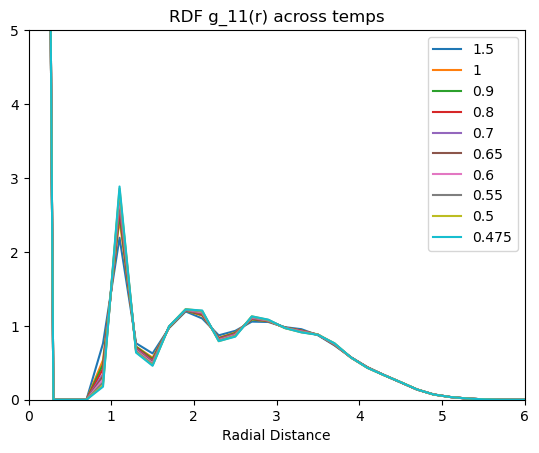

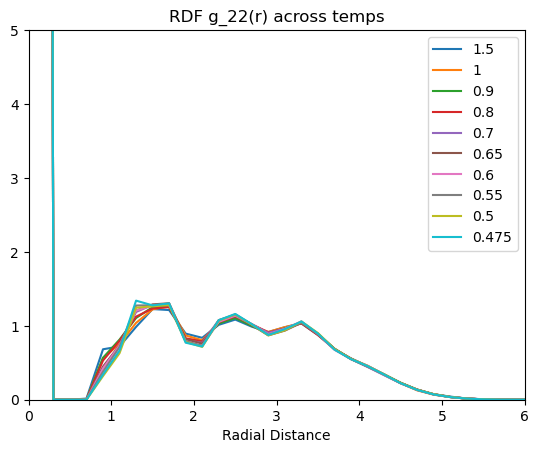

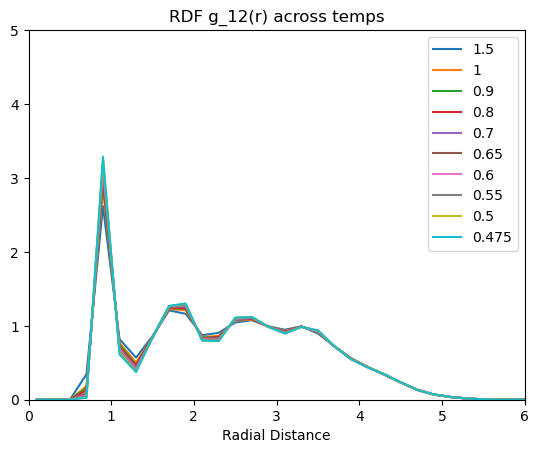

In [16]:
# Plot RDF Analysis
for temp in g_11s:
    plt.plot(g_11s[temp].bins, g_11s[temp].rdf, label=temp)
plt.title("RDF g_11(r) across temps")
plt.xlabel("Radial Distance")
plt.xlim(0,6)
plt.ylim(0,5)
plt.legend()
plt.savefig("../Figures/g_11.png")
plt.show()

for temp in g_22s:
    plt.plot(g_22s[temp].bins, g_22s[temp].rdf, label=temp)
plt.title("RDF g_22(r) across temps")
plt.xlabel("Radial Distance")
plt.xlim(0,6)
plt.ylim(0,5)
plt.legend()
plt.savefig("../Figures/g_22.png")
plt.show()

for temp in g_12s:
    plt.plot(g_12s[temp].bins, g_12s[temp].rdf, label=temp)
plt.title("RDF g_12(r) across temps")
plt.xlabel("Radial Distance")
plt.xlim(0,6)
plt.ylim(0,5)
plt.legend()
plt.savefig("../Figures/g_12.png")
plt.show()

In [22]:
# Run MSD Analysis
print(sims)
MSDs = {}
for temp in sims:
    #type1 = sims[temp].select_atoms("type 1")
    #type2 = sims[temp].select_atoms("type 2")
    
    MSD = msd.EinsteinMSD(sims[temp], select="type 1", msd_type="xyz", fft=True)
    MSD.run()
    MSDs[temp] = MSD.results.timeseries
print(MSDs)

{1.5: <Universe with 360 atoms>, 1: <Universe with 360 atoms>, 0.9: <Universe with 360 atoms>, 0.8: <Universe with 360 atoms>, 0.7: <Universe with 360 atoms>, 0.65: <Universe with 360 atoms>, 0.6: <Universe with 360 atoms>, 0.55: <Universe with 360 atoms>, 0.5: <Universe with 360 atoms>, 0.475: <Universe with 360 atoms>}


AttributeError: 'EinsteinMSD' object has no attribute 'EinsteinMSD'

In [ ]:
# Plot MSD Analysis